In [1]:
# !pip install -U scikit-learn
import pandas as pd
import numpy as np
import klib
from platform import python_version
import numpy as np
import geopandas as gpd
from shapely.geometry import shape
import matplotlib.pyplot as plt
import folium
from folium import plugins
import seaborn as sns

pd.set_option('display.max_columns', 100)

%precision 2
import pandas as pd
from datetime import datetime
%matplotlib inline


import os
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, RobustScaler
from sklearn.compose import ColumnTransformer

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
%matplotlib inline



# Initial imports
import pandas as pd
from pathlib import Path
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import accuracy_score, r2_score, recall_score, precision_score, roc_curve, roc_auc_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix

# Needed for decision tree visualization
import pydotplus
from IPython.display import Image


# Start a SparkSession
import findspark
findspark.init()

print('python',python_version())
print(np.__name__, np.__version__)
print(pd.__name__, pd.__version__)
print(klib.__name__, klib.__version__)

python 3.10.9
numpy 1.23.5
pandas 1.5.3
klib 1.0.7


In [2]:
df1 = pd.read_csv('Resources/Traffic Crashes.csv')

In [3]:
# Access the data as a pandas DataFrame object
df1.head()

,CRASH_RECORD_ID,RD_NO,CRASH_DATE_EST_I,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,LANE_CNT,ALIGNMENT,ROADWAY_SURFACE_COND,ROAD_DEFECT,REPORT_TYPE,CRASH_TYPE,INTERSECTION_RELATED_I,NOT_RIGHT_OF_WAY_I,HIT_AND_RUN_I,DAMAGE,DATE_POLICE_NOTIFIED,PRIM_CONTRIBUTORY_CAUSE,SEC_CONTRIBUTORY_CAUSE,STREET_NO,STREET_DIRECTION,STREET_NAME,BEAT_OF_OCCURRENCE,PHOTOS_TAKEN_I,STATEMENTS_TAKEN_I,DOORING_I,WORK_ZONE_I,WORK_ZONE_TYPE,WORKERS_PRESENT_I,NUM_UNITS,MOST_SEVERE_INJURY,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
0,79c7a2ce89f446262efd86df3d72d18b04ba487024b7c4...,JC199149,NaN,03/25/2019 02:43:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,ONE-WAY,4.0,STRAIGHT AND LEVEL,DRY,NO DEFECTS,ON SCENE,INJURY AND / OR TOW DUE TO CRASH,Y,NaN,NaN,"OVER $1,500",03/25/2019 03:17:00 PM,IMPROPER TURNING/NO SIGNAL,DRIVING SKILLS/KNOWLEDGE/EXPERIENCE,536,W,RANDOLPH ST,121.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,"REPORTED, NOT EVIDENT",1.0,0.0,0.0,0.0,1.0,2.0,0.0,14,2,3,41.884547,-87.641201,POINT (-87.64120093714 41.884547224337)
1,792b539deaaad65ee5b4a9691d927a34d298eb33d42af0...,JB422857,NaN,09/05/2018 08:40:00 AM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,ANGLE,NOT DIVIDED,2.0,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NOT ON SCENE (DESK REPORT),NO INJURY / DRIVE AWAY,NaN,NaN,NaN,"OVER $1,500",09/05/2018 09:00:00 AM,"VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS,...",FAILING TO YIELD RIGHT-OF-WAY,4821,N,ELSTON AVE,1712.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,0.0,8,4,9,41.968562,-87.740659,POINT (-87.740659314632 41.968562453871)
2,0115ade9a755e835255508463f7e9c4a9a0b47e9304238...,JF318029,NaN,07/15/2022 12:45:00 AM,30,UNKNOWN,UNKNOWN,CLEAR,"DARKNESS, LIGHTED ROAD",ANGLE,NOT DIVIDED,NaN,STRAIGHT AND LEVEL,DRY,UNKNOWN,ON SCENE,NO INJURY / DRIVE AWAY,NaN,NaN,NaN,"OVER $1,500",07/15/2022 12:50:00 AM,UNABLE TO DETERMINE,UNABLE TO DETERMINE,300,N,CENTRAL PARK AVE,1123.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0,6,7,41.886336,-87.716203,POINT (-87.716203130599 41.886336409761)
3,017040c61958d2fa977c956b2bd2d6759ef7754496dc96...,JF324552,NaN,07/15/2022 06:50:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,NOT DIVIDED,NaN,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NOT ON SCENE (DESK REPORT),NO INJURY / DRIVE AWAY,NaN,NaN,NaN,"OVER $1,500",07/20/2022 11:00:00 AM,UNABLE TO DETERMINE,UNABLE TO DETERMINE,2359,N,ASHLAND AVE,1811.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,0.0,18,6,7,41.925111,-87.667997,POINT (-87.667997321599 41.925110815832)
4,78eee027ec3dcc85d36c9e3fdae4729dcc56440105d65b...,JB291672,NaN,06/03/2018 05:00:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,UNKNOWN,PARKED MOTOR VEHICLE,ONE-WAY,1.0,STRAIGHT AND LEVEL,DRY,NO DEFECTS,ON SCENE,NO INJURY / DRIVE AWAY,NaN,NaN,Y,"OVER $1,500",06/03/2018 08:00:00 PM,UNABLE TO DETERMINE,UNABLE TO DETERMINE,1630,N,KEELER AVE,2534.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,1.0,0.0,17,1,6,41.910758,-87.731389,POINT (-87.731388754145 41.910757551599)


In [4]:
df1.describe()

,POSTED_SPEED_LIMIT,LANE_CNT,STREET_NO,BEAT_OF_OCCURRENCE,NUM_UNITS,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE
count,709406.000000,1.990010e+05,709406.000000,709401.000000,709402.000000,707866.000000,707866.000000,707866.000000,707866.000000,707866.000000,707866.000000,707866.0,709406.000000,709406.000000,709406.000000,704845.000000,704845.000000
mean,28.374799,1.333059e+01,3686.009869,1240.031085,2.034256,0.185739,0.001192,0.019973,0.104792,0.059781,2.006255,0.0,13.208854,4.125412,6.649042,41.854518,-87.673347
std,6.246458,2.961661e+03,2896.107301,705.288755,0.452918,0.558953,0.037567,0.165043,0.416738,0.314006,1.155954,0.0,5.559867,1.980333,3.464756,0.334368,0.679366
min,0.000000,0.000000e+00,0.000000,111.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,1.000000,0.000000,-87.936193
25%,30.000000,2.000000e+00,1239.000000,713.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,9.000000,2.000000,4.000000,41.781436,-87.721543
50%,30.000000,2.000000e+00,3200.000000,1135.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.0,14.000000,4.000000,7.000000,41.874531,-87.673770
75%,30.000000,4.000000e+00,5600.000000,1822.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.0,17.000000,6.000000,10.000000,41.924102,-87.633055
max,99.000000,1.191625e+06,451100.000000,6100.000000,18.000000,21.000000,4.000000,7.000000,21.000000,15.000000,61.000000,0.0,23.000000,7.000000,12.000000,42.022780,0.000000


In [5]:
# Remove the unwanted columns and any leading/trailing spaces
cols_to_remove = ["CRASH_RECORD_ID","CRASH_DATE_EST_I","LANE_CNT","REPORT_TYPE","INTERSECTION_RELATED_I",
                  "NOT_RIGHT_OF_WAY_I","HIT_AND_RUN_I","DATE_POLICE_NOTIFIED","SEC_CONTRIBUTORY_CAUSE",
                 "BEAT_OF_OCCURRENCE","PHOTOS_TAKEN_I","STATEMENTS_TAKEN_I",
                  "DOORING_I","WORK_ZONE_I","WORKERS_PRESENT_I","INJURIES_NON_INCAPACITATING","INJURIES_REPORTED_NOT_EVIDENT","INJURIES_NO_INDICATION","INJURIES_UNKNOWN",
                 "LOCATION"]
df1 = df1.drop([col.strip() for col in cols_to_remove if col.strip() in df1.columns], axis=1)

# Print the resulting DataFrame
df1.head()

,RD_NO,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,ALIGNMENT,ROADWAY_SURFACE_COND,ROAD_DEFECT,CRASH_TYPE,DAMAGE,PRIM_CONTRIBUTORY_CAUSE,STREET_NO,STREET_DIRECTION,STREET_NAME,WORK_ZONE_TYPE,NUM_UNITS,MOST_SEVERE_INJURY,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE
0,JC199149,03/25/2019 02:43:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,ONE-WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,"OVER $1,500",IMPROPER TURNING/NO SIGNAL,536,W,RANDOLPH ST,NaN,2.0,"REPORTED, NOT EVIDENT",1.0,0.0,0.0,14,2,3,41.884547,-87.641201
1,JB422857,09/05/2018 08:40:00 AM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,ANGLE,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,"OVER $1,500","VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS,...",4821,N,ELSTON AVE,NaN,2.0,NO INDICATION OF INJURY,0.0,0.0,0.0,8,4,9,41.968562,-87.740659
2,JF318029,07/15/2022 12:45:00 AM,30,UNKNOWN,UNKNOWN,CLEAR,"DARKNESS, LIGHTED ROAD",ANGLE,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,UNKNOWN,NO INJURY / DRIVE AWAY,"OVER $1,500",UNABLE TO DETERMINE,300,N,CENTRAL PARK AVE,NaN,2.0,NO INDICATION OF INJURY,0.0,0.0,0.0,0,6,7,41.886336,-87.716203
3,JF324552,07/15/2022 06:50:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,"OVER $1,500",UNABLE TO DETERMINE,2359,N,ASHLAND AVE,NaN,2.0,NO INDICATION OF INJURY,0.0,0.0,0.0,18,6,7,41.925111,-87.667997
4,JB291672,06/03/2018 05:00:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,UNKNOWN,PARKED MOTOR VEHICLE,ONE-WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,"OVER $1,500",UNABLE TO DETERMINE,1630,N,KEELER AVE,NaN,2.0,NO INDICATION OF INJURY,0.0,0.0,0.0,17,1,6,41.910758,-87.731389


In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 709406 entries, 0 to 709405
Data columns (total 29 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   RD_NO                    705395 non-null  object 
 1   CRASH_DATE               709406 non-null  object 
 2   POSTED_SPEED_LIMIT       709406 non-null  int64  
 3   TRAFFIC_CONTROL_DEVICE   709406 non-null  object 
 4   DEVICE_CONDITION         709406 non-null  object 
 5   WEATHER_CONDITION        709406 non-null  object 
 6   LIGHTING_CONDITION       709406 non-null  object 
 7   FIRST_CRASH_TYPE         709406 non-null  object 
 8   TRAFFICWAY_TYPE          709406 non-null  object 
 9   ALIGNMENT                709406 non-null  object 
 10  ROADWAY_SURFACE_COND     709406 non-null  object 
 11  ROAD_DEFECT              709406 non-null  object 
 12  CRASH_TYPE               709406 non-null  object 
 13  DAMAGE                   709406 non-null  object 
 14  PRIM

In [7]:
df1.DAMAGE

0           OVER $1,500
1           OVER $1,500
2           OVER $1,500
3           OVER $1,500
4           OVER $1,500
              ...      
709401      OVER $1,500
709402    $501 - $1,500
709403      OVER $1,500
709404      OVER $1,500
709405      OVER $1,500
Name: DAMAGE, Length: 709406, dtype: object

In [8]:
# Replace NaN values with 0 & NA
df1['WORK_ZONE_TYPE'] = df1['WORK_ZONE_TYPE'].fillna(value='NA')
df1['NUM_UNITS'] = df1['NUM_UNITS'].fillna(0)
df1['MOST_SEVERE_INJURY'] = df1['MOST_SEVERE_INJURY'].fillna(value='NA')
df1['INJURIES_TOTAL'] = df1['INJURIES_TOTAL'].fillna(0)
df1['LATITUDE'] = df1['LATITUDE'].fillna(0)
df1['LONGITUDE'] = df1['LONGITUDE'].fillna(0)
df1['RD_NO'] = df1['RD_NO'].fillna(value='NA')
df1['STREET_NAME'] = df1['STREET_NAME'].fillna(value='NA')
df1['STREET_DIRECTION'] = df1['STREET_DIRECTION'].fillna(value='NA')
df1['INJURIES_FATAL'] = df1['INJURIES_FATAL'].fillna(0)
df1['INJURIES_INCAPACITATING'] = df1['INJURIES_INCAPACITATING'].fillna(0)
# Print the resulting DataFrame
df1.head()

,RD_NO,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,ALIGNMENT,ROADWAY_SURFACE_COND,ROAD_DEFECT,CRASH_TYPE,DAMAGE,PRIM_CONTRIBUTORY_CAUSE,STREET_NO,STREET_DIRECTION,STREET_NAME,WORK_ZONE_TYPE,NUM_UNITS,MOST_SEVERE_INJURY,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE
0,JC199149,03/25/2019 02:43:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,ONE-WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,"OVER $1,500",IMPROPER TURNING/NO SIGNAL,536,W,RANDOLPH ST,NA,2.0,"REPORTED, NOT EVIDENT",1.0,0.0,0.0,14,2,3,41.884547,-87.641201
1,JB422857,09/05/2018 08:40:00 AM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,ANGLE,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,"OVER $1,500","VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS,...",4821,N,ELSTON AVE,NA,2.0,NO INDICATION OF INJURY,0.0,0.0,0.0,8,4,9,41.968562,-87.740659
2,JF318029,07/15/2022 12:45:00 AM,30,UNKNOWN,UNKNOWN,CLEAR,"DARKNESS, LIGHTED ROAD",ANGLE,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,UNKNOWN,NO INJURY / DRIVE AWAY,"OVER $1,500",UNABLE TO DETERMINE,300,N,CENTRAL PARK AVE,NA,2.0,NO INDICATION OF INJURY,0.0,0.0,0.0,0,6,7,41.886336,-87.716203
3,JF324552,07/15/2022 06:50:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,"OVER $1,500",UNABLE TO DETERMINE,2359,N,ASHLAND AVE,NA,2.0,NO INDICATION OF INJURY,0.0,0.0,0.0,18,6,7,41.925111,-87.667997
4,JB291672,06/03/2018 05:00:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,UNKNOWN,PARKED MOTOR VEHICLE,ONE-WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,"OVER $1,500",UNABLE TO DETERMINE,1630,N,KEELER AVE,NA,2.0,NO INDICATION OF INJURY,0.0,0.0,0.0,17,1,6,41.910758,-87.731389


In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 709406 entries, 0 to 709405
Data columns (total 29 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   RD_NO                    709406 non-null  object 
 1   CRASH_DATE               709406 non-null  object 
 2   POSTED_SPEED_LIMIT       709406 non-null  int64  
 3   TRAFFIC_CONTROL_DEVICE   709406 non-null  object 
 4   DEVICE_CONDITION         709406 non-null  object 
 5   WEATHER_CONDITION        709406 non-null  object 
 6   LIGHTING_CONDITION       709406 non-null  object 
 7   FIRST_CRASH_TYPE         709406 non-null  object 
 8   TRAFFICWAY_TYPE          709406 non-null  object 
 9   ALIGNMENT                709406 non-null  object 
 10  ROADWAY_SURFACE_COND     709406 non-null  object 
 11  ROAD_DEFECT              709406 non-null  object 
 12  CRASH_TYPE               709406 non-null  object 
 13  DAMAGE                   709406 non-null  object 
 14  PRIM

In [10]:
# get the sorted CRASH_DATE
Sort_Dates = df1['CRASH_DATE'].sort_values()

# display the result
print(Sort_Dates)

155829    01/01/2016 01:00:00 AM
620708    01/01/2016 01:00:00 AM
202260    01/01/2016 01:00:00 AM
196300    01/01/2016 01:03:00 AM
272220    01/01/2016 01:18:00 AM
                   ...          
689523    12/31/2022 12:47:00 PM
667422    12/31/2022 12:52:00 AM
695223    12/31/2022 12:53:00 PM
688908    12/31/2022 12:55:00 PM
657062    12/31/2022 12:58:00 PM
Name: CRASH_DATE, Length: 709406, dtype: object


In [11]:
# convert CRASH_DATE column to datetime datatype - UTC
df1['CRASH_DATE'] = pd.to_datetime(df1['CRASH_DATE'], format='%m/%d/%Y %I:%M:%S %p')

# extract year from CRASH_DATE column and create new CRASH_YEAR column
df1['CRASH_YEAR'] = df1['CRASH_DATE'].dt.year

In [12]:
# df1.info()
# df1['CRASH_TYPE']
df1['INJURY_CAT'] = df1['CRASH_TYPE']

df1['INJURY_CAT'] = df1['INJURY_CAT'].replace(['NO INJURY / DRIVE AWAY', 'INJURY AND / OR TOW DUE TO CRASH'], [0, 1])
df1['DAMAGE_COST'] = df1['DAMAGE']
df1['DAMAGE_COST'] = df1['DAMAGE_COST'].replace(['OVER $1,500', '$501 - $1,500','$500 OR LESS'], [1500,1000, 500])


In [13]:
df1

,RD_NO,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,ALIGNMENT,ROADWAY_SURFACE_COND,ROAD_DEFECT,CRASH_TYPE,DAMAGE,PRIM_CONTRIBUTORY_CAUSE,STREET_NO,STREET_DIRECTION,STREET_NAME,WORK_ZONE_TYPE,NUM_UNITS,MOST_SEVERE_INJURY,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,CRASH_YEAR,INJURY_CAT,DAMAGE_COST
0,JC199149,2019-03-25 14:43:00,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,ONE-WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,"OVER $1,500",IMPROPER TURNING/NO SIGNAL,536,W,RANDOLPH ST,NA,2.0,"REPORTED, NOT EVIDENT",1.0,0.0,0.0,14,2,3,41.884547,-87.641201,2019,1,1500
1,JB422857,2018-09-05 08:40:00,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,ANGLE,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,"OVER $1,500","VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS,...",4821,N,ELSTON AVE,NA,2.0,NO INDICATION OF INJURY,0.0,0.0,0.0,8,4,9,41.968562,-87.740659,2018,0,1500
2,JF318029,2022-07-15 00:45:00,30,UNKNOWN,UNKNOWN,CLEAR,"DARKNESS, LIGHTED ROAD",ANGLE,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,UNKNOWN,NO INJURY / DRIVE AWAY,"OVER $1,500",UNABLE TO DETERMINE,300,N,CENTRAL PARK AVE,NA,2.0,NO INDICATION OF INJURY,0.0,0.0,0.0,0,6,7,41.886336,-87.716203,2022,0,1500
3,JF324552,2022-07-15 18:50:00,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,"OVER $1,500",UNABLE TO DETERMINE,2359,N,ASHLAND AVE,NA,2.0,NO INDICATION OF INJURY,0.0,0.0,0.0,18,6,7,41.925111,-87.667997,2022,0,1500
4,JB291672,2018-06-03 17:00:00,30,NO CONTROLS,NO CONTROLS,CLEAR,UNKNOWN,PARKED MOTOR VEHICLE,ONE-WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,"OVER $1,500",UNABLE TO DETERMINE,1630,N,KEELER AVE,NA,2.0,NO INDICATION OF INJURY,0.0,0.0,0.0,17,1,6,41.910758,-87.731389,2018,0,1500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
709401,NA,2023-03-22 08:26:00,30,STOP SIGN/FLASHER,NO CONTROLS,CLEAR,DAYLIGHT,TURNING,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,"OVER $1,500",FOLLOWING TOO CLOSELY,800,E,95TH ST,NA,2.0,NO INDICATION OF INJURY,0.0,0.0,0.0,8,4,3,41.722154,-87.604448,2023,0,1500
709402,NA,2023-03-23 12:40:00,15,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,FIXED OBJECT,PARKING LOT,STRAIGHT AND LEVEL,DRY,UNKNOWN,NO INJURY / DRIVE AWAY,"$501 - $1,500",UNABLE TO DETERMINE,755,W,LAWRENCE AVE,NA,1.0,NO INDICATION OF INJURY,0.0,0.0,0.0,12,5,3,41.969052,-87.649789,2023,0,1000
709403,NA,2023-03-22 22:25:00,30,NO CONTROLS,NO CONTROLS,RAIN,"DARKNESS, LIGHTED ROAD",TURNING,NOT DIVIDED,STRAIGHT AND LEVEL,WET,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,"OVER $1,500",UNABLE TO DETERMINE,214,S,WOOD ST,NA,2.0,"REPORTED, NOT EVIDENT",1.0,0.0,0.0,22,4,3,41.878275,-87.671816,2023,1,1500
709404,JG173150,2023-03-03 19:00:00,30,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",REAR END,DIVIDED - W/MEDIAN BARRIER,STRAIGHT AND LEVEL,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,"OVER $1,500",UNABLE TO DETERMINE,699,N,LAKE SHORE DR NB,NA,2.0,NO INDICATION OF INJURY,0.0,0.0,0.0,19,6,3,41.895082,-87.615314,2023,1,1500


In [14]:
df1.to_csv('Resources/Clean_Traffic_Crashes.csv', index=False)

In [15]:
import zipfile

# create a zip file object
zip_file = zipfile.ZipFile('Resources/Clean_Traffic_Crashes.zip', 'w')

# add files to the zip file
zip_file.write('Resources/Clean_Traffic_Crashes.csv')


# close the zip file object
zip_file.close()

In [16]:
#Import packages
from pyspark.sql import SparkSession
import time

# Create a SparkSession
spark = SparkSession.builder.appName("SparkSQL").getOrCreate()

In [17]:
from pyspark import SparkFiles
url = "Resources/Clean_Traffic_Crashes.csv"


spark.sparkContext.addFile(url)
df = spark.read.option('header', 'true').csv(SparkFiles.get("Clean_Traffic_Crashes.csv"), inferSchema=True, sep=',', timestampFormat="mm/dd/yy")

# Show DataFrame
df.show()

+--------+-------------------+------------------+----------------------+--------------------+-----------------+--------------------+--------------------+--------------------+------------------+--------------------+-----------+--------------------+-------------+-----------------------+---------+----------------+----------------+--------------+---------+--------------------+--------------+--------------+-----------------------+----------+-----------------+-----------+-----------+------------+----------+----------+-----------+
|   RD_NO|         CRASH_DATE|POSTED_SPEED_LIMIT|TRAFFIC_CONTROL_DEVICE|    DEVICE_CONDITION|WEATHER_CONDITION|  LIGHTING_CONDITION|    FIRST_CRASH_TYPE|     TRAFFICWAY_TYPE|         ALIGNMENT|ROADWAY_SURFACE_COND|ROAD_DEFECT|          CRASH_TYPE|       DAMAGE|PRIM_CONTRIBUTORY_CAUSE|STREET_NO|STREET_DIRECTION|     STREET_NAME|WORK_ZONE_TYPE|NUM_UNITS|  MOST_SEVERE_INJURY|INJURIES_TOTAL|INJURIES_FATAL|INJURIES_INCAPACITATING|CRASH_HOUR|CRASH_DAY_OF_WEEK|CRASH_MONTH|

In [18]:
# Show schema to confirm date type
df.printSchema()

root
 |-- RD_NO: string (nullable = true)
 |-- CRASH_DATE: string (nullable = true)
 |-- POSTED_SPEED_LIMIT: integer (nullable = true)
 |-- TRAFFIC_CONTROL_DEVICE: string (nullable = true)
 |-- DEVICE_CONDITION: string (nullable = true)
 |-- WEATHER_CONDITION: string (nullable = true)
 |-- LIGHTING_CONDITION: string (nullable = true)
 |-- FIRST_CRASH_TYPE: string (nullable = true)
 |-- TRAFFICWAY_TYPE: string (nullable = true)
 |-- ALIGNMENT: string (nullable = true)
 |-- ROADWAY_SURFACE_COND: string (nullable = true)
 |-- ROAD_DEFECT: string (nullable = true)
 |-- CRASH_TYPE: string (nullable = true)
 |-- DAMAGE: string (nullable = true)
 |-- PRIM_CONTRIBUTORY_CAUSE: string (nullable = true)
 |-- STREET_NO: integer (nullable = true)
 |-- STREET_DIRECTION: string (nullable = true)
 |-- STREET_NAME: string (nullable = true)
 |-- WORK_ZONE_TYPE: string (nullable = true)
 |-- NUM_UNITS: double (nullable = true)
 |-- MOST_SEVERE_INJURY: string (nullable = true)
 |-- INJURIES_TOTAL: double 

In [19]:
# Import date time functions
from pyspark.sql.functions import year

# Show the year for the date column
# df.select(year(df["date"])).show()
df.select(year(df.CRASH_DATE)).show()

+----------------+
|year(CRASH_DATE)|
+----------------+
|            2019|
|            2018|
|            2022|
|            2022|
|            2018|
|            2022|
|            2022|
|            2017|
|            2018|
|            2020|
|            2017|
|            2022|
|            2022|
|            2022|
|            2022|
|            2022|
|            2022|
|            2018|
|            2019|
|            2017|
+----------------+
only showing top 20 rows



In [20]:
# Save the year as a new column
df = df.withColumn("year", year(df['CRASH_DATE']))
df.show()

+--------+-------------------+------------------+----------------------+--------------------+-----------------+--------------------+--------------------+--------------------+------------------+--------------------+-----------+--------------------+-------------+-----------------------+---------+----------------+----------------+--------------+---------+--------------------+--------------+--------------+-----------------------+----------+-----------------+-----------+-----------+------------+----------+----------+-----------+----+
|   RD_NO|         CRASH_DATE|POSTED_SPEED_LIMIT|TRAFFIC_CONTROL_DEVICE|    DEVICE_CONDITION|WEATHER_CONDITION|  LIGHTING_CONDITION|    FIRST_CRASH_TYPE|     TRAFFICWAY_TYPE|         ALIGNMENT|ROADWAY_SURFACE_COND|ROAD_DEFECT|          CRASH_TYPE|       DAMAGE|PRIM_CONTRIBUTORY_CAUSE|STREET_NO|STREET_DIRECTION|     STREET_NAME|WORK_ZONE_TYPE|NUM_UNITS|  MOST_SEVERE_INJURY|INJURIES_TOTAL|INJURIES_FATAL|INJURIES_INCAPACITATING|CRASH_HOUR|CRASH_DAY_OF_WEEK|CRASH_M

In [21]:
# Create a temporary view of the DataFrame.
df.createOrReplaceTempView('chicago')

In [22]:
query = """
(SELECT RD_NO, SUM(INJURIES_TOTAL)
FROM chicago
WHERE year ==2019
GROUP BY RD_NO)
"""
spark.sql(query).show()

+--------+-------------------+
|   RD_NO|sum(INJURIES_TOTAL)|
+--------+-------------------+
|JC292003|                1.0|
|JC309314|                0.0|
|JC464723|                0.0|
|JC415182|                0.0|
|JC415875|                0.0|
|JC422423|                0.0|
|JC142710|                0.0|
|JC403186|                1.0|
|JC246995|                0.0|
|JC482511|                0.0|
|JC107681|                1.0|
|JC165943|                6.0|
|JC124615|                0.0|
|JC255355|                0.0|
|JC210947|                0.0|
|JC155062|                0.0|
|JC121778|                0.0|
|JC549175|                0.0|
|JC155558|                0.0|
|JC544555|                0.0|
+--------+-------------------+
only showing top 20 rows



In [23]:
query = """
(SELECT DAMAGE, COUNT(DAMAGE)
FROM chicago
GROUP BY  DAMAGE)
"""
spark.sql(query).show()

+-------------+-------------+
|       DAMAGE|count(DAMAGE)|
+-------------+-------------+
|  OVER $1,500|       431908|
|$501 - $1,500|       194272|
| $500 OR LESS|        83226|
+-------------+-------------+



In [24]:
query = """
(SELECT DAMAGE, sum(DAMAGE_COST),avg(DAMAGE_COST)
FROM chicago
GROUP BY  DAMAGE)
"""
spark.sql(query).show()

+-------------+----------------+----------------+
|       DAMAGE|sum(DAMAGE_COST)|avg(DAMAGE_COST)|
+-------------+----------------+----------------+
|  OVER $1,500|       647862000|          1500.0|
|$501 - $1,500|       194272000|          1000.0|
| $500 OR LESS|        41613000|           500.0|
+-------------+----------------+----------------+



In [25]:
query = """
(SELECT CRASH_YEAR,CRASH_DATE,RD_NO, STREET_NO,STREET_NAME,
MOST_SEVERE_INJURY,INJURIES_TOTAL,LATITUDE,LONGITUDE
FROM chicago
LIMIT(10))
"""
spark.sql(query).show()

+----------+-------------------+--------+---------+----------------+--------------------+--------------+-----------+------------+
|CRASH_YEAR|         CRASH_DATE|   RD_NO|STREET_NO|     STREET_NAME|  MOST_SEVERE_INJURY|INJURIES_TOTAL|   LATITUDE|   LONGITUDE|
+----------+-------------------+--------+---------+----------------+--------------------+--------------+-----------+------------+
|      2019|2019-03-25 14:43:00|JC199149|      536|     RANDOLPH ST|REPORTED, NOT EVI...|           1.0|41.88454722|-87.64120094|
|      2018|2018-09-05 08:40:00|JB422857|     4821|      ELSTON AVE|NO INDICATION OF ...|           0.0|41.96856245|-87.74065932|
|      2022|2022-07-15 00:45:00|JF318029|      300|CENTRAL PARK AVE|NO INDICATION OF ...|           0.0|41.88633641|-87.71620313|
|      2022|2022-07-15 18:50:00|JF324552|     2359|     ASHLAND AVE|NO INDICATION OF ...|           0.0|41.92511082|-87.66799732|
|      2018|2018-06-03 17:00:00|JB291672|     1630|      KEELER AVE|NO INDICATION OF ...| 

<Axes: title={'center': 'CRASH_TYPE'}>

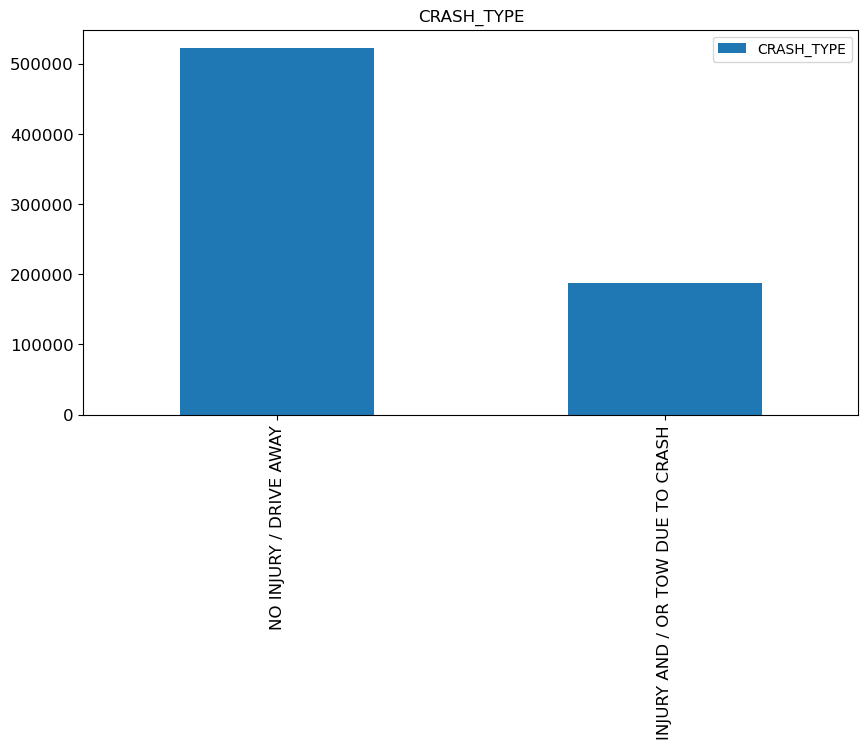

In [26]:
df1['CRASH_TYPE'].value_counts().plot(kind='bar', title ="CRASH_TYPE", figsize=(10, 5), legend=True, fontsize=12)

<Axes: title={'center': 'DAMAGE'}, ylabel='DAMAGE'>

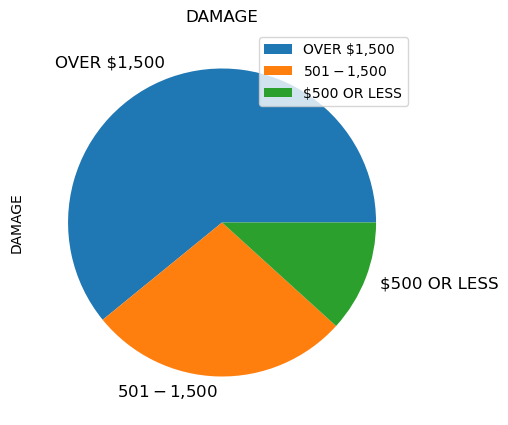

In [27]:
df1['DAMAGE'].value_counts().plot(kind='pie', title ="DAMAGE", figsize=(10, 5), legend=True, fontsize=12)

<Axes: title={'center': 'WEATHER_CONDITION'}>

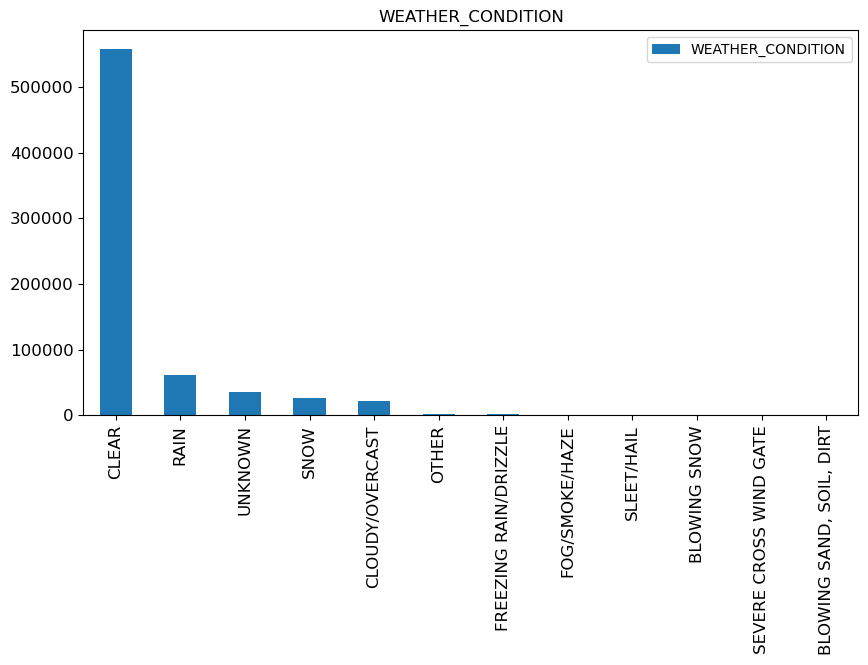

In [28]:
df1['WEATHER_CONDITION'].value_counts().plot(kind='bar', title ="WEATHER_CONDITION", figsize=(10, 5), legend=True, fontsize=12)

<Axes: title={'center': 'road surface condition'}>

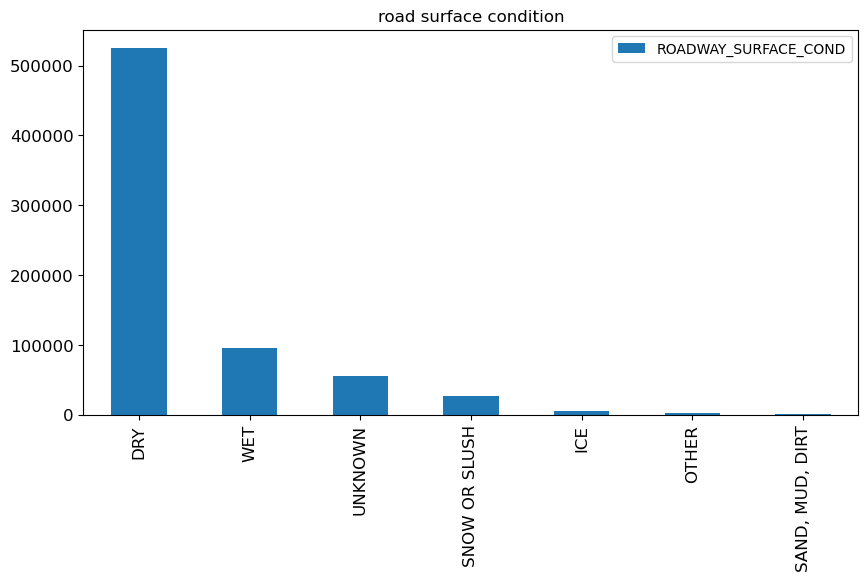

In [29]:
df1['ROADWAY_SURFACE_COND'].value_counts().plot(kind='bar', title ="road surface condition", figsize=(10, 5), legend=True, fontsize=12)

<Axes: title={'center': 'Crash by Month'}, xlabel='CRASH_MONTH'>

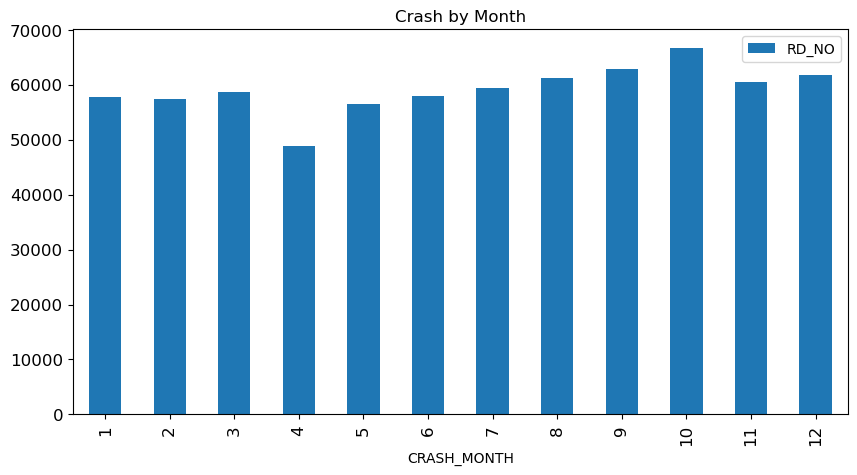

In [30]:
df1.groupby(['CRASH_MONTH']).count()['RD_NO'].plot(kind='bar', title ="Crash by Month", figsize=(10, 5), legend=True, fontsize=12)

<Axes: title={'center': 'Crash by Contributory Factors'}, xlabel='PRIM_CONTRIBUTORY_CAUSE'>

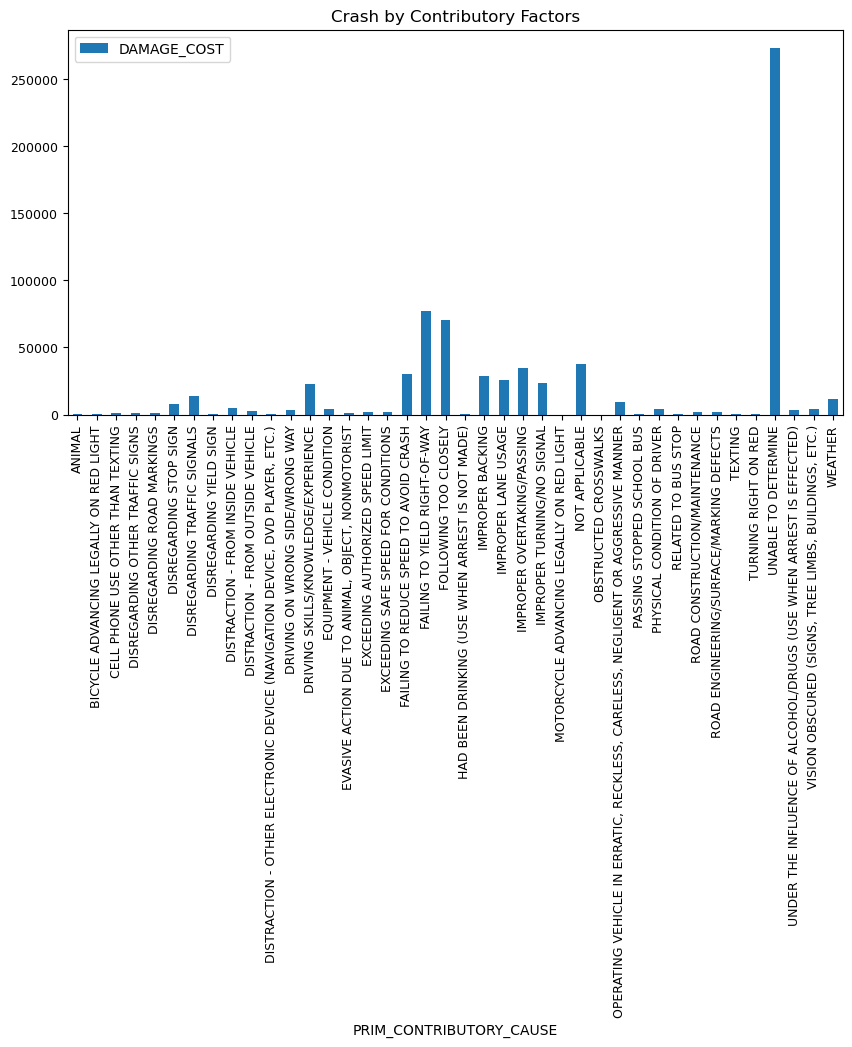

In [31]:
df1.groupby(['PRIM_CONTRIBUTORY_CAUSE']).count()['DAMAGE_COST'].plot(kind='bar', title ="Crash by Contributory Factors", figsize=(10, 5), legend=True, fontsize=9)

<Axes: title={'center': 'Crash by Day'}, xlabel='CRASH_DAY_OF_WEEK'>

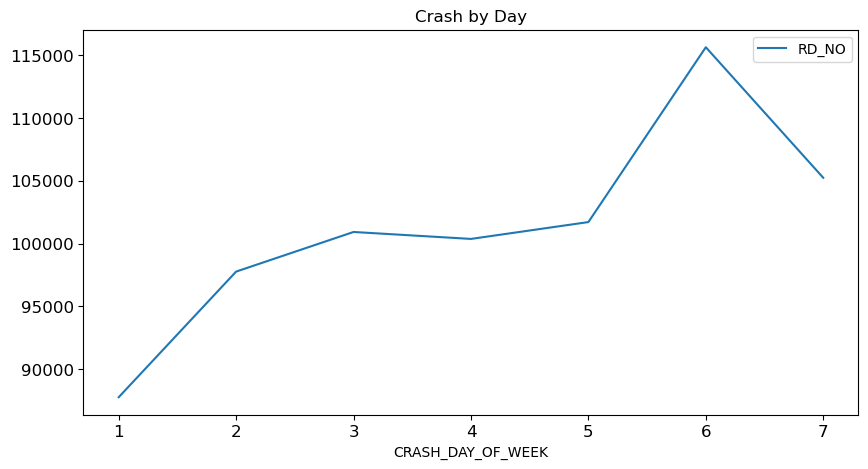

In [32]:
df1.groupby(['CRASH_DAY_OF_WEEK']).count()['RD_NO'].plot(kind='line', title ="Crash by Day", figsize=(10, 5), legend=True, fontsize=12)

<Axes: title={'center': 'Crash by Hour'}, xlabel='CRASH_HOUR'>

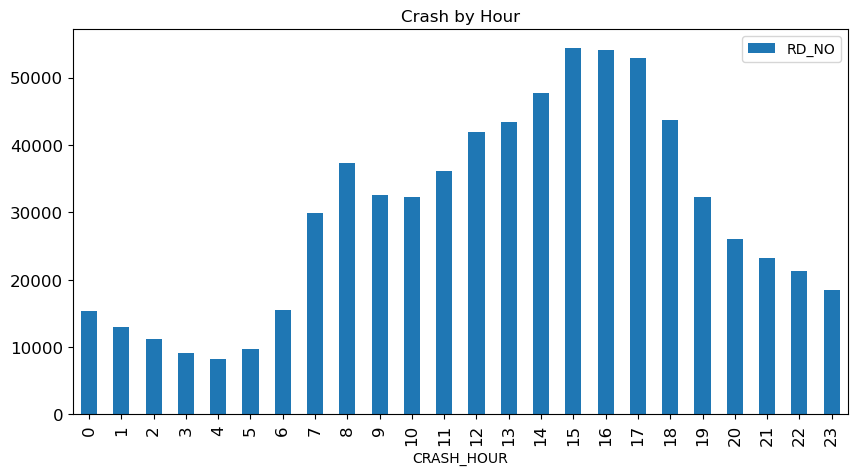

In [33]:
df1.groupby(['CRASH_HOUR']).count()['RD_NO'].plot(kind='bar', title ="Crash by Hour", figsize=(10, 5), legend=True, fontsize=12)

In [34]:
df1

,RD_NO,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,ALIGNMENT,ROADWAY_SURFACE_COND,ROAD_DEFECT,CRASH_TYPE,DAMAGE,PRIM_CONTRIBUTORY_CAUSE,STREET_NO,STREET_DIRECTION,STREET_NAME,WORK_ZONE_TYPE,NUM_UNITS,MOST_SEVERE_INJURY,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,CRASH_YEAR,INJURY_CAT,DAMAGE_COST
0,JC199149,2019-03-25 14:43:00,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,ONE-WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,"OVER $1,500",IMPROPER TURNING/NO SIGNAL,536,W,RANDOLPH ST,NA,2.0,"REPORTED, NOT EVIDENT",1.0,0.0,0.0,14,2,3,41.884547,-87.641201,2019,1,1500
1,JB422857,2018-09-05 08:40:00,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,ANGLE,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,"OVER $1,500","VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS,...",4821,N,ELSTON AVE,NA,2.0,NO INDICATION OF INJURY,0.0,0.0,0.0,8,4,9,41.968562,-87.740659,2018,0,1500
2,JF318029,2022-07-15 00:45:00,30,UNKNOWN,UNKNOWN,CLEAR,"DARKNESS, LIGHTED ROAD",ANGLE,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,UNKNOWN,NO INJURY / DRIVE AWAY,"OVER $1,500",UNABLE TO DETERMINE,300,N,CENTRAL PARK AVE,NA,2.0,NO INDICATION OF INJURY,0.0,0.0,0.0,0,6,7,41.886336,-87.716203,2022,0,1500
3,JF324552,2022-07-15 18:50:00,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,"OVER $1,500",UNABLE TO DETERMINE,2359,N,ASHLAND AVE,NA,2.0,NO INDICATION OF INJURY,0.0,0.0,0.0,18,6,7,41.925111,-87.667997,2022,0,1500
4,JB291672,2018-06-03 17:00:00,30,NO CONTROLS,NO CONTROLS,CLEAR,UNKNOWN,PARKED MOTOR VEHICLE,ONE-WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,"OVER $1,500",UNABLE TO DETERMINE,1630,N,KEELER AVE,NA,2.0,NO INDICATION OF INJURY,0.0,0.0,0.0,17,1,6,41.910758,-87.731389,2018,0,1500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
709401,NA,2023-03-22 08:26:00,30,STOP SIGN/FLASHER,NO CONTROLS,CLEAR,DAYLIGHT,TURNING,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,"OVER $1,500",FOLLOWING TOO CLOSELY,800,E,95TH ST,NA,2.0,NO INDICATION OF INJURY,0.0,0.0,0.0,8,4,3,41.722154,-87.604448,2023,0,1500
709402,NA,2023-03-23 12:40:00,15,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,FIXED OBJECT,PARKING LOT,STRAIGHT AND LEVEL,DRY,UNKNOWN,NO INJURY / DRIVE AWAY,"$501 - $1,500",UNABLE TO DETERMINE,755,W,LAWRENCE AVE,NA,1.0,NO INDICATION OF INJURY,0.0,0.0,0.0,12,5,3,41.969052,-87.649789,2023,0,1000
709403,NA,2023-03-22 22:25:00,30,NO CONTROLS,NO CONTROLS,RAIN,"DARKNESS, LIGHTED ROAD",TURNING,NOT DIVIDED,STRAIGHT AND LEVEL,WET,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,"OVER $1,500",UNABLE TO DETERMINE,214,S,WOOD ST,NA,2.0,"REPORTED, NOT EVIDENT",1.0,0.0,0.0,22,4,3,41.878275,-87.671816,2023,1,1500
709404,JG173150,2023-03-03 19:00:00,30,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",REAR END,DIVIDED - W/MEDIAN BARRIER,STRAIGHT AND LEVEL,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,"OVER $1,500",UNABLE TO DETERMINE,699,N,LAKE SHORE DR NB,NA,2.0,NO INDICATION OF INJURY,0.0,0.0,0.0,19,6,3,41.895082,-87.615314,2023,1,1500


In [35]:
df1.columns

Index(['RD_NO', 'CRASH_DATE', 'POSTED_SPEED_LIMIT', 'TRAFFIC_CONTROL_DEVICE',
       'DEVICE_CONDITION', 'WEATHER_CONDITION', 'LIGHTING_CONDITION',
       'FIRST_CRASH_TYPE', 'TRAFFICWAY_TYPE', 'ALIGNMENT',
       'ROADWAY_SURFACE_COND', 'ROAD_DEFECT', 'CRASH_TYPE', 'DAMAGE',
       'PRIM_CONTRIBUTORY_CAUSE', 'STREET_NO', 'STREET_DIRECTION',
       'STREET_NAME', 'WORK_ZONE_TYPE', 'NUM_UNITS', 'MOST_SEVERE_INJURY',
       'INJURIES_TOTAL', 'INJURIES_FATAL', 'INJURIES_INCAPACITATING',
       'CRASH_HOUR', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH', 'LATITUDE',
       'LONGITUDE', 'CRASH_YEAR', 'INJURY_CAT', 'DAMAGE_COST'],
      dtype='object')

In [36]:
df1_features = ['RD_NO', 'CRASH_DATE', 'POSTED_SPEED_LIMIT', 'TRAFFIC_CONTROL_DEVICE',
       'DEVICE_CONDITION', 'WEATHER_CONDITION', 'LIGHTING_CONDITION',
       'FIRST_CRASH_TYPE', 'TRAFFICWAY_TYPE', 'ALIGNMENT',
       'ROADWAY_SURFACE_COND', 'ROAD_DEFECT', 'CRASH_TYPE', 'DAMAGE',
       'PRIM_CONTRIBUTORY_CAUSE', 'STREET_NO', 'STREET_DIRECTION',
       'STREET_NAME', 'WORK_ZONE_TYPE', 'NUM_UNITS', 'MOST_SEVERE_INJURY',
       'INJURIES_TOTAL', 'INJURIES_FATAL', 'INJURIES_INCAPACITATING',
       'CRASH_HOUR', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH', 'LATITUDE','DAMAGE_COST',
       'LONGITUDE', 'CRASH_YEAR'
            ]

In [37]:
# Convert geo-dataframe into a regular dataframe.
df2 = pd.DataFrame(df1[df1_features])

#df.shape
df2.describe()

,POSTED_SPEED_LIMIT,STREET_NO,NUM_UNITS,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,DAMAGE_COST,LONGITUDE,CRASH_YEAR
count,709406.000000,709406.000000,709406.000000,709406.000000,709406.000000,709406.000000,709406.000000,709406.000000,709406.000000,709406.000000,709406.000000,709406.000000,709406.000000
mean,28.374799,3686.009869,2.034244,0.185335,0.001190,0.019929,13.208854,4.125412,6.649042,41.585422,1245.756309,-87.109667,2019.392113
std,6.246458,2896.107301,0.452942,0.558413,0.037526,0.164866,5.559867,1.980333,3.464756,3.361782,348.053295,7.039932,1.991114
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,500.000000,-87.936193,2013.000000
25%,30.000000,1239.000000,2.000000,0.000000,0.000000,0.000000,9.000000,2.000000,4.000000,41.780151,1000.000000,-87.721251,2018.000000
50%,30.000000,3200.000000,2.000000,0.000000,0.000000,0.000000,14.000000,4.000000,7.000000,41.874133,1500.000000,-87.673226,2019.000000
75%,30.000000,5600.000000,2.000000,0.000000,0.000000,0.000000,17.000000,6.000000,10.000000,41.923920,1500.000000,-87.632517,2021.000000
max,99.000000,451100.000000,18.000000,21.000000,4.000000,7.000000,23.000000,7.000000,12.000000,42.022780,1500.000000,0.000000,2023.000000


In [38]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 709406 entries, 0 to 709405
Data columns (total 31 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   RD_NO                    709406 non-null  object        
 1   CRASH_DATE               709406 non-null  datetime64[ns]
 2   POSTED_SPEED_LIMIT       709406 non-null  int64         
 3   TRAFFIC_CONTROL_DEVICE   709406 non-null  object        
 4   DEVICE_CONDITION         709406 non-null  object        
 5   WEATHER_CONDITION        709406 non-null  object        
 6   LIGHTING_CONDITION       709406 non-null  object        
 7   FIRST_CRASH_TYPE         709406 non-null  object        
 8   TRAFFICWAY_TYPE          709406 non-null  object        
 9   ALIGNMENT                709406 non-null  object        
 10  ROADWAY_SURFACE_COND     709406 non-null  object        
 11  ROAD_DEFECT              709406 non-null  object        
 12  CRASH_TYPE      

C:\Users\akiye\AppData\Local\Temp\ipykernel_7188\2524220229.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_mat = df2.corr()


<Axes: >

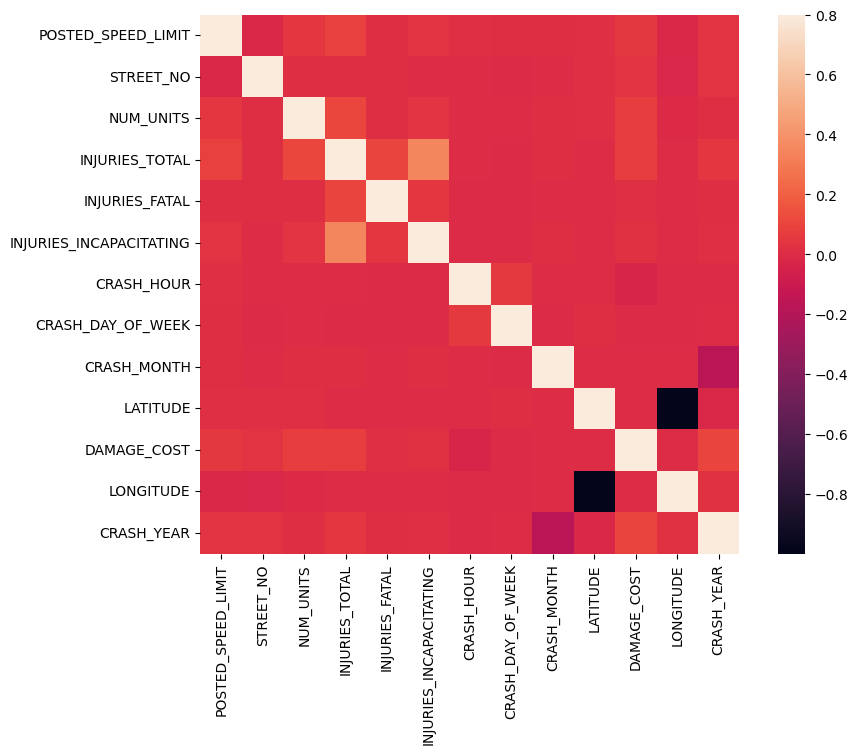

In [39]:
corr_mat = df2.corr()
f, ax = plt.subplots(figsize=(10, 7))
sns.heatmap(corr_mat, vmax=.8, square=True)

In [40]:
query = """
(SELECT *
FROM chicago
WHERE year=2020 AND CRASH_MONTH IN (1,2,3))
"""
df_crash=spark.sql(query).show()
df_crash

+--------+-------------------+------------------+----------------------+--------------------+-----------------+--------------------+--------------------+--------------------+------------------+--------------------+-----------+--------------------+-------------+-----------------------+---------+----------------+----------------+--------------+---------+--------------------+--------------+--------------+-----------------------+----------+-----------------+-----------+-----------+------------+----------+----------+-----------+----+
|   RD_NO|         CRASH_DATE|POSTED_SPEED_LIMIT|TRAFFIC_CONTROL_DEVICE|    DEVICE_CONDITION|WEATHER_CONDITION|  LIGHTING_CONDITION|    FIRST_CRASH_TYPE|     TRAFFICWAY_TYPE|         ALIGNMENT|ROADWAY_SURFACE_COND|ROAD_DEFECT|          CRASH_TYPE|       DAMAGE|PRIM_CONTRIBUTORY_CAUSE|STREET_NO|STREET_DIRECTION|     STREET_NAME|WORK_ZONE_TYPE|NUM_UNITS|  MOST_SEVERE_INJURY|INJURIES_TOTAL|INJURIES_FATAL|INJURIES_INCAPACITATING|CRASH_HOUR|CRASH_DAY_OF_WEEK|CRASH_M

In [41]:
spark.conf.set("spark.sql.execution.arrow.enabled", "true")

df4 = spark.sql(query).toPandas()
df4

,RD_NO,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,ALIGNMENT,ROADWAY_SURFACE_COND,ROAD_DEFECT,CRASH_TYPE,DAMAGE,PRIM_CONTRIBUTORY_CAUSE,STREET_NO,STREET_DIRECTION,STREET_NAME,WORK_ZONE_TYPE,NUM_UNITS,MOST_SEVERE_INJURY,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,CRASH_YEAR,INJURY_CAT,DAMAGE_COST,year
0,JD184955,2020-03-13 21:45:00,25,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",REAR END,ONE-WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,$500 OR LESS,FOLLOWING TOO CLOSELY,183,S,WELLS ST,NA,2.0,NO INDICATION OF INJURY,0.0,0.0,0.0,21,6,3,41.879415,-87.633606,2020,0,500,2020
1,JD116085,2020-01-14 23:15:00,30,STOP SIGN/FLASHER,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",TURNING,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,"$501 - $1,500",IMPROPER TURNING/NO SIGNAL,1214,E,53RD ST,NA,2.0,NO INDICATION OF INJURY,0.0,0.0,0.0,23,3,1,41.799572,-87.595997,2020,0,1000,2020
2,JD122763,2020-01-20 22:48:00,35,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",ANGLE,UNKNOWN INTERSECTION TYPE,STRAIGHT AND LEVEL,DRY,UNKNOWN,NO INJURY / DRIVE AWAY,"OVER $1,500",DISREGARDING STOP SIGN,3424,W,OGDEN AVE,NA,2.0,NO INDICATION OF INJURY,0.0,0.0,0.0,22,2,1,41.856015,-87.711318,2020,0,1500,2020
3,JD134580,2020-01-30 22:54:00,30,UNKNOWN,UNKNOWN,UNKNOWN,"DARKNESS, LIGHTED ROAD",REAR TO FRONT,UNKNOWN INTERSECTION TYPE,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,NO INJURY / DRIVE AWAY,"OVER $1,500",NOT APPLICABLE,3700,W,CONGRESS PKWY,NA,2.0,NO INDICATION OF INJURY,0.0,0.0,0.0,22,5,1,41.874595,-87.718136,2020,0,1500,2020
4,JD159847,2020-02-20 19:50:00,20,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",ANGLE,T-INTERSECTION,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,"$501 - $1,500",FAILING TO REDUCE SPEED TO AVOID CRASH,4164,W,WABANSIA AVE,NA,2.0,NO INDICATION OF INJURY,0.0,0.0,0.0,19,5,2,41.911754,-87.731212,2020,0,1000,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24366,JD189551,2020-03-13 14:50:00,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,T-INTERSECTION,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,"OVER $1,500",FOLLOWING TOO CLOSELY,101,W,87TH ST,NA,2.0,NO INDICATION OF INJURY,0.0,0.0,0.0,14,6,3,41.736154,-87.627240,2020,0,1500,2020
24367,JD149870,2020-02-13 00:05:00,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,SNOW,DARKNESS,REAR END,NOT DIVIDED,STRAIGHT AND LEVEL,SNOW OR SLUSH,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,"OVER $1,500",NOT APPLICABLE,13000,S,STONY ISLAND AVE,NA,2.0,NO INDICATION OF INJURY,0.0,0.0,0.0,0,5,2,0.000000,0.000000,2020,1,1500,2020
24368,JD144014,2020-02-07 20:23:00,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",REAR END,NOT DIVIDED,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,NO INJURY / DRIVE AWAY,"$501 - $1,500",UNABLE TO DETERMINE,815,S,AUSTIN BLVD,NA,2.0,NO INDICATION OF INJURY,0.0,0.0,0.0,20,6,2,0.000000,0.000000,2020,0,1000,2020
24369,JD118213,2020-01-16 17:30:00,30,UNKNOWN,FUNCTIONING PROPERLY,CLEAR,DUSK,REAR END,DIVIDED - W/MEDIAN (NOT RAISED),STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,"$501 - $1,500",FOLLOWING TOO CLOSELY,502,W,OHARE ST,NA,2.0,NO INDICATION OF INJURY,0.0,0.0,0.0,17,5,1,0.000000,0.000000,2020,0,1000,2020


In [42]:
df4.to_csv('Resources/2020_Clean_Traffic_Crashes.csv', index=False)